In [1]:
%pip install numpy pandas seaborn matplotlib # install the necessary packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from functions import *


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
goyal_welch_data = pd.read_csv('../macro_data/GoyalWelchPredictorData2022Monthly.csv', index_col=0)
goyal_welch_data.index = pd.to_datetime(goyal_welch_data.index, format='%Y%m')

for column in goyal_welch_data.columns:
    goyal_welch_data[column] = [float(str(x).replace(',', '')) for x in goyal_welch_data[column]]


In [3]:
goyal_welch_data

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
yyyymm,,,,,,,,,,,,,,,,,
1871-01-01,4.44,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-02-01,4.50,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-03-01,4.61,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-04-01,4.74,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-05-01,4.86,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,3955.00,64.8854,188.8067,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.001900,-0.000354,-0.0421,-0.0293,0.003349,NaN,-0.040305,-0.042052
2022-09-01,3585.62,65.3183,187.0800,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.001900,0.002151,-0.0769,-0.0526,0.004934,NaN,-0.091495,-0.092876
2022-10-01,3871.98,65.8531,182.3033,0.218935,0.0372,0.0510,0.0626,0.0398,-0.015252,0.002300,0.004056,-0.0139,-0.0103,0.006504,NaN,0.080248,0.079196


# GLD ticker 

In [4]:
gld_monthly_returns = pd.read_csv('../macro_data/gld_monthly_returns.csv', index_col=0)

gld_monthly_returns.index = pd.to_datetime(gld_monthly_returns.index, format='%Y-%m')


In [5]:
start_date = goyal_welch_data.index.min() if goyal_welch_data.index.min() > gld_monthly_returns.index.min() else gld_monthly_returns.index.min()
end_date = goyal_welch_data.index.max() if goyal_welch_data.index.max() < gld_monthly_returns.index.max() else gld_monthly_returns.index.max()

start_date, end_date

(Timestamp('2004-12-01 00:00:00'), Timestamp('2022-12-01 00:00:00'))

In [6]:
filtered_spy_monthly_returns = gld_monthly_returns.loc[start_date:end_date]
filtered_goyal_welch_data = goyal_welch_data.loc[start_date:end_date]

filtered_goyal_welch_data['excess_returns'] = gld_monthly_returns['GLD'] - filtered_goyal_welch_data['Rfree']

filtered_goyal_welch_data['excess_returns']

/tmp/ipykernel_84637/1243567426.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_goyal_welch_data['excess_returns'] = gld_monthly_returns['GLD'] - filtered_goyal_welch_data['Rfree']


yyyymm
2004-12-01   -0.030855
2005-01-01   -0.037673
2005-02-01    0.029428
2005-03-01   -0.018411
2005-04-01    0.010277
                ...   
2022-08-01   -0.031333
2022-09-01   -0.030782
2022-10-01   -0.020144
2022-11-01    0.082019
2022-12-01    0.026006
Name: excess_returns, Length: 217, dtype: float64

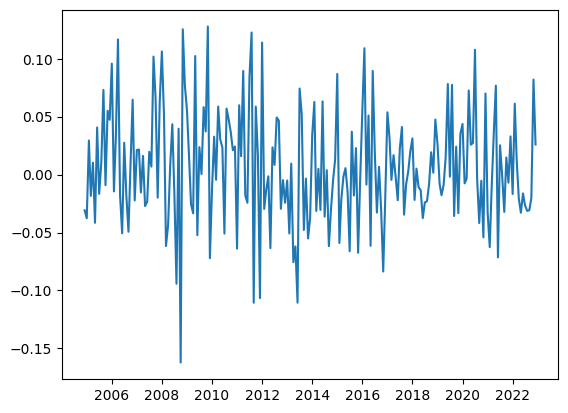

In [7]:
plt.plot(filtered_goyal_welch_data['excess_returns'])

Text(0.5, 1.0, 'leverage = 0.6')

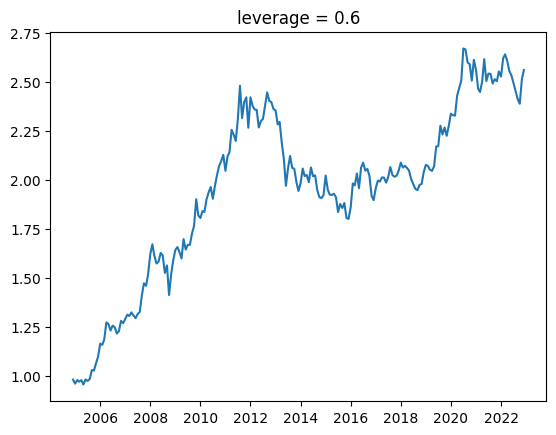

In [8]:
leverage = 0.6
strategy_returns = 1 + filtered_goyal_welch_data.Rfree + leverage * filtered_goyal_welch_data.excess_returns
plt.plot(np.cumprod(strategy_returns))
plt.title(f'leverage = {leverage}')

In [9]:
cleaned_data = filtered_goyal_welch_data.drop(columns=['csp']).fillna(0)

In [10]:
cleaned_data[['Index', 'D12', 'E12']] = (cleaned_data[['Index', 'D12', 'E12']] / cleaned_data[['Index', 'D12', 'E12']].shift(1)).fillna(0)
print(cleaned_data)

               Index       D12       E12       b/m     tbl     AAA     BAA  \
yyyymm                                                                       
2004-12-01  0.000000  0.000000  0.000000  0.270619  0.0219  0.0547  0.0615   
2005-01-01  0.974710  1.013425  1.009508  0.278180  0.0233  0.0536  0.0602   
2005-02-01  1.018903  1.013247  1.009417  0.271041  0.0254  0.0520  0.0582   
2005-03-01  0.980882  1.013074  1.009331  0.319857  0.0274  0.0540  0.0606   
2005-04-01  0.979891  1.011535  1.016827  0.329624  0.0278  0.0533  0.0605   
...              ...       ...       ...       ...     ...     ...     ...   
2022-08-01  0.957560  1.006717  0.990938  0.227429  0.0263  0.0407  0.0515   
2022-09-01  0.906604  1.006672  0.990855  0.249478  0.0313  0.0459  0.0569   
2022-10-01  1.079863  1.008188  0.974467  0.218935  0.0372  0.0510  0.0626   
2022-11-01  1.053753  1.008123  0.973799  0.207182  0.0415  0.0490  0.0607   
2022-12-01  0.941029  1.008056  0.973093  0.216199  0.0425  0.04

In [11]:
signal_columns = ['Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
        'Rfree', 'infl', 'ltr', 'corpr', 'svar']

data_for_signals = cleaned_data[signal_columns].shift(1).fillna(0) # shifting of signals happens here !
labels = cleaned_data.excess_returns.values.reshape(-1, 1)
data_for_signals['infl'] = data_for_signals['infl'].shift(1).fillna(0) # this is because inflation is actually published later
signals = data_for_signals.values
data_for_signals.shape, data_for_signals.columns

((217, 14),
 Index(['Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
        'Rfree', 'infl', 'ltr', 'corpr', 'svar'],
       dtype='object'))

In [12]:
data_for_signals

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar
yyyymm,,,,,,,,,,,,,,
2004-12-01,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.000000,0.0000,0.0000,0.000000
2005-01-01,0.000000,0.000000,0.000000,0.270619,0.0219,0.0547,0.0615,0.0484,0.013002,0.0016,0.000000,0.0250,0.0257,0.000728
2005-02-01,0.974710,1.013425,1.009508,0.278180,0.0233,0.0536,0.0602,0.0465,0.013545,0.0016,-0.003665,0.0300,0.0277,0.000821
2005-03-01,1.018903,1.013247,1.009417,0.271041,0.0254,0.0520,0.0582,0.0479,0.011758,0.0016,0.002102,-0.0128,-0.0112,0.000834
2005-04-01,0.980882,1.013074,1.009331,0.319857,0.0274,0.0540,0.0606,0.0488,0.009097,0.0021,0.005768,-0.0072,-0.0125,0.000860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,1.091116,1.006762,0.991019,0.218187,0.0223,0.0406,0.0521,0.0290,-0.006121,0.0008,0.013736,0.0270,0.0324,0.003188
2022-09-01,0.957560,1.006717,0.990938,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.0019,-0.000118,-0.0421,-0.0293,0.003349
2022-10-01,0.906604,1.006672,0.990855,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.0019,-0.000354,-0.0769,-0.0526,0.004934


In [13]:
normalize_raw_data = True
cheat_and_use_future_data = False  # set to True if you want to have
normalization_method = 'min-max'
#our fun experiment to show how even know a bit about the future can drastically imprpve performance

shrinkage_list = [0.00000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

split = int(signals.shape[0] / 2)
train_labels = labels[:split]
test_labels = labels[split:]

if normalize_raw_data:
    signals[:split, :], normalization_based_on_train = normalize(signals[:split], method=normalization_method)
    # this is our fun experiment to show how even know a bit about the future can drastically imprpve performance
    if cheat_and_use_future_data:
      signals[split:, :] = normalize(signals[split:, :])[0]
    else:
      signals[split:, :] = normalize(signals[split:, :],
                                     ready_normalization=normalization_based_on_train, method=normalization_method)[0]

beta_estimate_using_train_sample, oos_predictions = ridge_regr(signals=signals[:split, :],
                                                                labels=train_labels,
                                                                future_signals=signals[split:, :],
                                                                shrinkage_list=shrinkage_list)

oos_predictions = pd.DataFrame(oos_predictions, index=cleaned_data.index[split:], columns = shrinkage_list)
print(oos_predictions)

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
2013-12-01      0.032435      0.031662      0.027633      0.021322   
2014-01-01      0.029623      0.029506      0.028766      0.025329   
2014-02-01      0.011357      0.011361      0.011013      0.008735   
2014-03-01      0.023846      0.023042      0.018810      0.012382   
2014-04-01      0.012066      0.011631      0.009239      0.004984   
...                  ...           ...           ...           ...   
2022-08-01     -0.007578     -0.009176     -0.016779     -0.018686   
2022-09-01      0.076431      0.072991      0.052994      0.014940   
2022-10-01      0.093085      0.089220      0.066731      0.022973   
2022-11-01      0.021064      0.019046      0.009524      0.005718   
2022-12-01      0.041646      0.040207      0.032673      0.022795   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

In [14]:
pd.DataFrame(beta_estimate_using_train_sample, columns=shrinkage_list, index=data_for_signals.columns)

,1.000000e-08,1.000000e-05,1.000000e-04,1.000000e-03,1.000000e-02,1.000000e-01,1.000000e+00,1.000000e+01,1.000000e+02,1.000000e+03
Index,-0.356993,-0.349376,-0.291068,-0.092496,0.002662,0.005456,0.002345,0.000395,0.000043,4.294519e-06
D12,0.312412,0.308526,0.271956,0.113327,0.018848,0.007054,0.002837,0.000475,0.000051,5.157615e-06
E12,0.089363,0.086033,0.065820,0.026458,0.015183,0.003797,0.000483,0.000052,0.000005,5.239638e-07
b/m,-0.113800,-0.110085,-0.086779,-0.034730,-0.000129,0.004507,0.001475,0.000240,0.000026,2.596315e-06
tbl,-0.053751,-0.055335,-0.059491,-0.032065,-0.001857,0.002282,0.000331,-0.000015,-0.000003,-2.838709e-07
AAA,0.450288,0.420687,0.268119,0.072503,0.023244,0.009161,0.002526,0.000377,0.000040,4.021954e-06
BAA,0.109389,0.111483,0.111409,0.061618,0.027786,0.008945,0.001907,0.000264,0.000028,2.786951e-06
lty,-0.402932,-0.378232,-0.243397,-0.036769,0.014007,0.008180,0.002363,0.000348,0.000037,3.708263e-06
ntis,0.103752,0.100747,0.082255,0.042541,0.021349,0.006836,0.001180,0.000156,0.000016,1.645044e-06
Rfree,0.099474,0.098755,0.089934,0.040614,0.006957,0.002595,0.000262,-0.000029,-0.000004,-4.345714e-07


In [15]:
market_timing_returns = oos_predictions * test_labels.reshape(-1, 1)
print(market_timing_returns) # we have one timing return for each value of z

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
2013-12-01     -0.001231     -0.001201     -0.001049     -0.000809   
2014-01-01      0.001013      0.001009      0.000983      0.000866   
2014-02-01      0.000712      0.000712      0.000691      0.000548   
2014-03-01     -0.000749     -0.000724     -0.000591     -0.000389   
2014-04-01      0.000060      0.000057      0.000046      0.000025   
...                  ...           ...           ...           ...   
2022-08-01      0.000237      0.000288      0.000526      0.000585   
2022-09-01     -0.002353     -0.002247     -0.001631     -0.000460   
2022-10-01     -0.001875     -0.001797     -0.001344     -0.000463   
2022-11-01      0.001728      0.001562      0.000781      0.000469   
2022-12-01      0.001083      0.001046      0.000850      0.000593   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

In [16]:
cleaned_data = pd.concat([cleaned_data, market_timing_returns], axis=1)

In [17]:
tmp = cleaned_data[['excess_returns'] + shrinkage_list].iloc[split:]
tmp = tmp / tmp.std()
sr = sharpe_ratio(tmp)

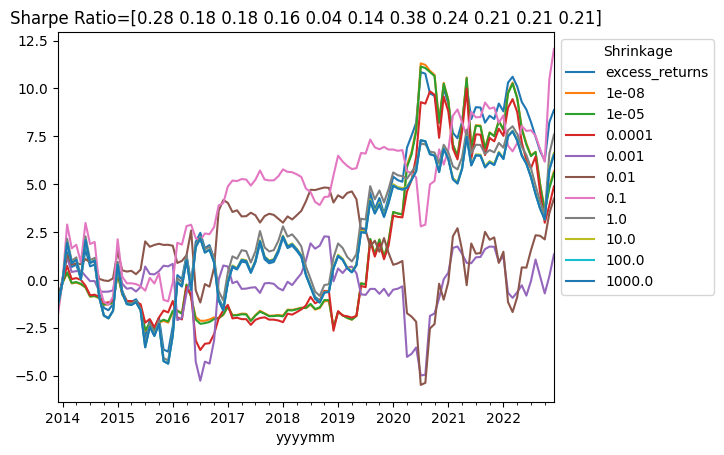

In [18]:
tmp.cumsum().plot()
plt.title(f'Sharpe Ratio={sr.values.flatten()}')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title = 'Shrinkage')

In [19]:
tstat = regression_with_tstats(predicted_variable=tmp[1.], explanatory_variables=tmp['excess_returns'])
print(tstat)

const            -0.2
excess_returns    8.6
Name: z, dtype: float64


In [20]:
P = 50000
d = 14
scale = 1.
omega = scale * np.sqrt(2) * np.random.randn(d, P) / np.sqrt(d)
ins_sin = np.sqrt(2) * np.sin(signals @ omega) # this is n times P
ins_cos = np.sqrt(2) * np.cos(signals @ omega) # this is also n times P
random_features = np.append(ins_sin, ins_cos, axis=1) # this is n times (2P)

In [21]:
random_features.shape

(217, 100000)

In [22]:
split = int(signals.shape[0] / 2)

labels = cleaned_data.excess_returns.values.reshape(-1, 1)

train_labels = labels[:split]
test_labels = labels[split:]

beta_estimate_using_train_sample, oos_predictions = ridge_regr(signals=random_features[:split, :],
                                                                labels=train_labels,
                                                                future_signals=random_features[split:, :],
                                                                shrinkage_list=shrinkage_list)

oos_predictions = pd.DataFrame(oos_predictions, index=cleaned_data.index[split:], columns = shrinkage_list)
print(oos_predictions)

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
2013-12-01     -0.277807     -0.268221     -0.216613     -0.130026   
2014-01-01     -0.310298     -0.294268     -0.213374     -0.101252   
2014-02-01     -0.038421     -0.033620     -0.009068      0.027003   
2014-03-01     -0.074150     -0.068967     -0.049056     -0.032374   
2014-04-01      0.111575      0.108263      0.090772      0.057346   
...                  ...           ...           ...           ...   
2022-08-01      0.042186      0.098001      0.267687      0.052396   
2022-09-01     -0.121212     -0.112500     -0.056978      0.007139   
2022-10-01      0.173448      0.173260      0.177392      0.149421   
2022-11-01     -0.005678      0.013581      0.077693      0.056190   
2022-12-01      0.071847      0.104097      0.225906      0.232724   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

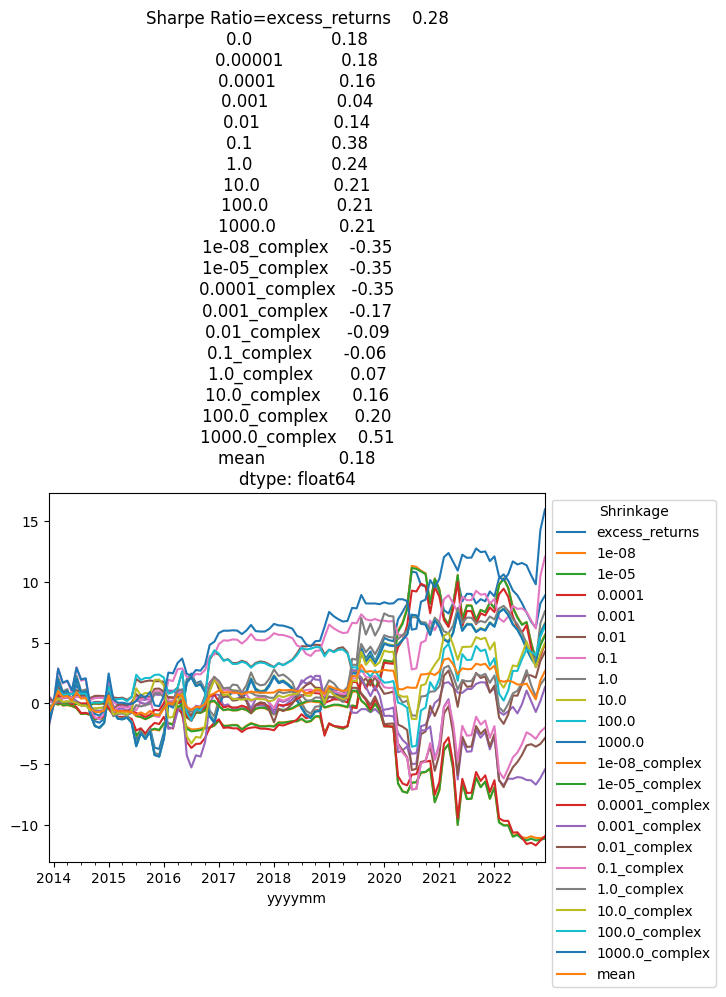

In [23]:
market_timing_returns_complex = oos_predictions * test_labels
market_timing_returns_complex.columns = [f'{x}_complex' for x in market_timing_returns_complex.columns]

cleaned_data = pd.concat([cleaned_data, market_timing_returns_complex], axis=1)

# 'excess_returns' are just market returns; it is important we keep them
# shrinkage_list: these are the columns corresponding to the simple linear model with just 13 predictors
tmp = cleaned_data[['excess_returns'] + shrinkage_list + list(market_timing_returns_complex.columns)].iloc[split:, :]
tmp = tmp / tmp.std()
tmp['mean'] = tmp.mean(1)
sr = sharpe_ratio(tmp)
tmp.cumsum().plot()
plt.title(f'Sharpe Ratio={sr}')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title = 'Shrinkage')
#plt.savefig(os.path.join(folder, 'performance_pl9ot.jpeg'))

In [24]:
cleaned_data.corr()[1000]

Index             0.005536
D12              -0.014512
E12              -0.094910
b/m              -0.035794
tbl               0.073092
AAA              -0.061655
BAA              -0.023529
lty              -0.095211
ntis             -0.044580
Rfree             0.106105
infl             -0.033107
ltr               0.392449
corpr             0.389553
svar              0.025766
CRSP_SPvw         0.002791
CRSP_SPvwx        0.003500
excess_returns    0.965401
0.0               0.585620
0.00001           0.573780
0.0001            0.456867
0.001            -0.284121
0.01             -0.410361
0.1               0.432437
1.0               0.992191
10.0              0.999919
100.0             0.999999
1000.0            1.000000
1e-08_complex    -0.330165
1e-05_complex    -0.330220
0.0001_complex   -0.340267
0.001_complex    -0.454379
0.01_complex     -0.544647
0.1_complex      -0.395361
1.0_complex      -0.026215
10.0_complex     -0.285776
100.0_complex    -0.441565
1000.0_complex    0.391753
N

In [25]:
tstats = regression_with_tstats(predicted_variable=tmp['1000.0_complex'], explanatory_variables=tmp[['excess_returns', 1000]])
print(tstats)

const             3.2
excess_returns   -2.5
1000.0            3.0
Name: z, dtype: float64
